# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rafi Prathama Nugraha
- **Email:** m312b4ky3585@bangkit.academy
- **ID Dicoding:** rafi_prathama

## Menentukan Pertanyaan Bisnis

- Apakah terdapat perbedaan signifikan jumlah pengunjung antara hari libur dan hari biasa?
- Bagaimana pengaruh kelembapan terhadap total jumlah peminjam sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


## Data Wrangling

### Gathering Data

In [15]:
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
df_hour = pd.read_csv("hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Penggabungan 2 data sumber. Memudahkan untuk pemeriksaan struktur data.
- Pengumpulan dataset berdasarkan parameter beserta variabel lainnya.

### Assessing Data

In [17]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [18]:
df_day.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [19]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [20]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [21]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [22]:
df_hour.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [23]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [24]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada analisis statistik, memeriksa data duplikat, missing value. Proses ini mendapatkan ringkasan statistik dan informasi umum tentang dataset.
- Memastikan tipe data yang sudah sesuai penting, karena dapat menyebabkan kesalahan saat analisis.

### Cleaning Data

In [26]:
df_day.dropna(inplace=True)
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [28]:
df_hour.dropna(inplace=True)
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [29]:
all_data = pd.concat([df_day, df_hour])
all_data.to_csv("all_data.csv", index=False)

**Insight:**
- Missing value dan duplikat pada baris dapat menggangu analisis, karena dapat menyebabkan bias dan hasil analisis menjadi tidak akurat.
- Membersihkan baris duplikat dan missing value dengan imputasi dapat membantu memastikan hasil analisis yang lebih akurat.

## Exploratory Data Analysis (EDA)

### Explore ...

In [34]:
print(all_data.describe())
all_data.isnull().sum()

            instant        season            yr          mnth       holiday  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean    8354.006405      2.501436      0.502485      6.537051      0.028769   
std     5180.771860      1.107045      0.500008      3.439213      0.167160   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3797.250000      2.000000      0.000000      4.000000      0.000000   
50%     8324.500000      3.000000      1.000000      7.000000      0.000000   
75%    12851.750000      3.000000      1.000000     10.000000      0.000000   
max    17379.000000      4.000000      1.000000     12.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean       3.003424      0.682772      1.424075      0.496922      0.475718   
std        2.005677      0.465410      0.635830    

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [81]:
all_data.groupby(by="holiday", observed=False).cnt.sum().sort_values(ascending=False).reset_index().head(10)

,holiday,cnt
0,0,6428488
1,1,156870


In [83]:
average_rentals = all_data.groupby('holiday')['cnt'].mean().reset_index()
average_rentals.columns = ['Holiday', 'Average Rentals']
print(average_rentals)

   Holiday  Average Rentals
0        0       365.483427
1        1       301.094050


In [84]:
bins = [0, 0.3, 0.6, 0.8, 1.0]
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
all_data['hum_category'] = pd.cut(all_data['hum'], bins=bins, labels=labels)

average_rentals_hum = all_data.groupby('hum_category')['cnt'].mean().reset_index()
print(average_rentals_hum)

    hum_category         cnt
0         Rendah  319.485450
1         Sedang  419.497807
2         Tinggi  425.882046
3  Sangat Tinggi  181.952956


<ipython-input-84-6d27b3ca9669>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rentals_hum = all_data.groupby('hum_category')['cnt'].mean().reset_index()


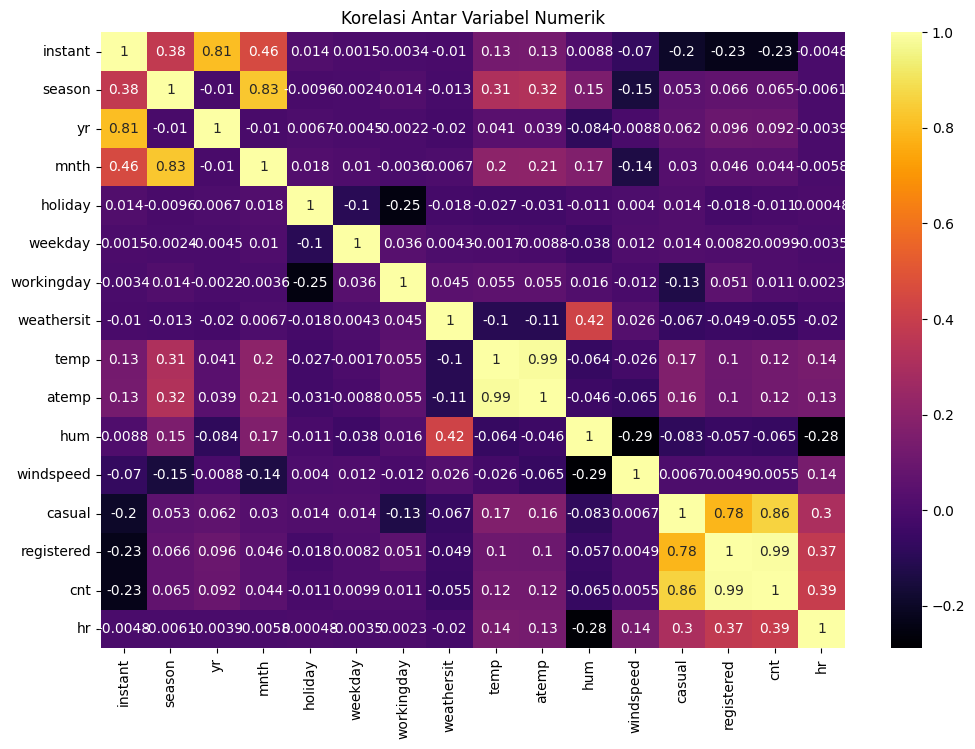

In [68]:
numerical = all_data.select_dtypes(include=['float64', 'int64'])
correlation = numerical.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='inferno')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

**Insight:**
- DataFrame diatas memberikan penjelasan tentang banyaknya pengunjung yang datang di waktu weekday maupun holiday. Sehingga dapat digunakan untuk pengambilan keputusan.
- Penjelasan mengenai pengaruh kelembaban juga di jelaskan pada jumlah pengunjung di tingkat tertentu lebih banyak daripada tingkat yang lain.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat perbedaan signifikan jumlah pengunjung antara hari libur dan hari biasa?

<ipython-input-91-0fe58c4ad6b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rentals, x='Holiday', y='Average Rentals', palette='pastel', legend=False)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


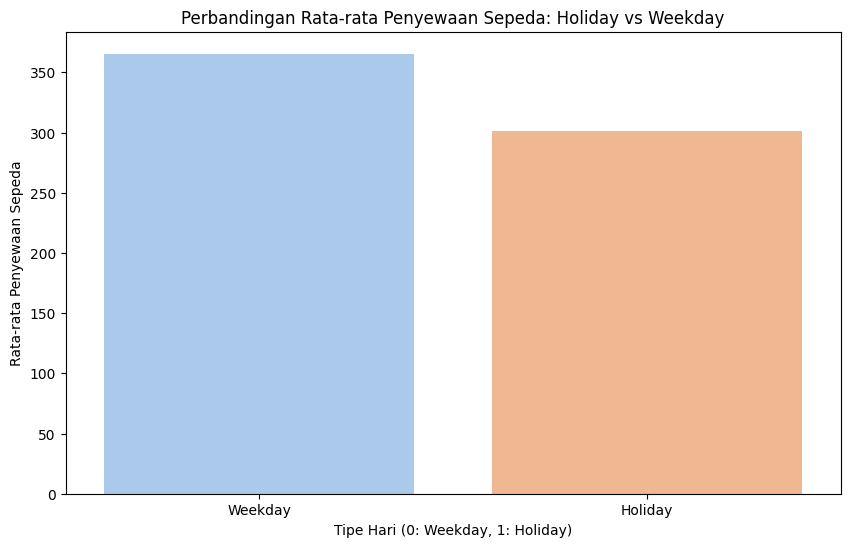

In [91]:
plt.figure(figsize=(10, 6))

sns.barplot(data=average_rentals, x='Holiday', y='Average Rentals', palette='pastel', legend=False)

plt.title('Perbandingan Rata-rata Penyewaan Sepeda: Holiday vs Weekday')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xlabel('Tipe Hari (0: Weekday, 1: Holiday)')

plt.xticks(ticks=[0, 1], labels=['Weekday', 'Holiday'])
plt.show()

### Pertanyaan 2: Bagaimana pengaruh kelembapan terhadap total jumlah peminjam sepeda?

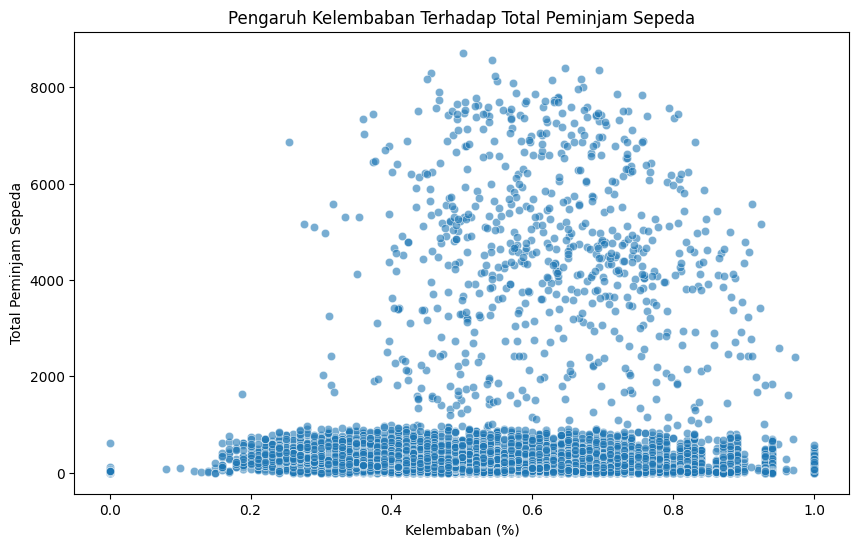

In [96]:
# Visualisasi scatter plot antara kelembaban dan total peminjam sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=all_data, alpha=0.6)
plt.title('Pengaruh Kelembaban Terhadap Total Peminjam Sepeda')
plt.xlabel('Kelembaban (%)')
plt.ylabel('Total Peminjam Sepeda')
plt.show()

**Insight:**
- Diagram Batang memberikan gambaran tentang perbedaan jumlah pengunjung antara waktu holiday dan weekday. Rata-rata jumlah pengunjung pada hari kerja lebih banyak dibandingkan hari libur. Hal ini dikarenakan peminjaman sepeda dilakukan untuk kerja maupun aktivitas diluar ruangan, sehingga rata-rata jumlah peminjam sepeda di hari kerja lebih banyak.
- Scatter plot menunjukkan hubungan yang jelas antara kelembapan dan total peminjam sepeda. Ketika kelembapan meningkat, jumlah peminjam sepeda cenderung meningkat, tetapi dengan tingkat kelembapan tertentu (tinggi dan sangat tinggi) julah peminjam mulai menurun.

## Conclusion

- Pertanyaan 1: Terdapat perbedaan rata-rata jumlah peminjam sepeda antara hari libur dan hari kerja. Aktifitas diluar ruangan dan pekerjaan yang membutuhkan transportasi membuat peminjaman sepeda lebih banyak dilakukan pada hari kerja dibanding hari libur. Akan tetapi perbedaan jumlah peminjam tidak signifikan.
- Pertanyaan 2: Secara keseluruhan, kelembaban berpengaruh terhadap jumlah peminjam sepeda. kelembaban yang rendah hingga sedang cenderung mendukung aktifitas bersepeda, sementara kelembaban yang sangat tinggi kurang diminati orang untuk menyewa sepeda.